## New packages 
```pip install pandas```

```pip install statsmodels```

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
import statsmodels.api as sm

## UCI Bike Sharing Dataset
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Importing Data

In [3]:
bikes = np.genfromtxt("Data/bikedc.csv", delimiter=',', skip_header=1)

In [4]:
bikes=pd.read_csv("Data/bikedc.csv")

In [5]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,1,1,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,1,1,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,1,1,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,1,1,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,1,1,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
np.unique(bikes["mnth"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Data Wrangling

In [7]:
print(bikes.head())

   season  mnth  day  hr  holiday  weekday  workingday  weathersit  temp  \
0       1     1    1   0        0        6           0           1  0.24   
1       1     1    1   1        0        6           0           1  0.22   
2       1     1    1   2        0        6           0           1  0.22   
3       1     1    1   3        0        6           0           1  0.24   
4       1     1    1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


In [8]:
print(bikes.describe())

            season         mnth         day           hr      holiday  \
count  8645.000000  8645.000000  8645.00000  8645.000000  8645.000000   
mean      2.513592     6.573973   184.39572    11.573626     0.027646   
std       1.105477     3.428147   104.82334     6.907822     0.163966   
min       1.000000     1.000000     1.00000     0.000000     0.000000   
25%       2.000000     4.000000    94.00000     6.000000     0.000000   
50%       3.000000     7.000000   185.00000    12.000000     0.000000   
75%       3.000000    10.000000   275.00000    18.000000     0.000000   
max       4.000000    12.000000   365.00000    23.000000     1.000000   

           weekday   workingday   weathersit         temp       atemp  \
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.00000   
mean      3.012724     0.683748     1.437594     0.489069     0.46900   
std       2.006370     0.465040     0.653859     0.197943     0.17676   
min       0.000000     0.000000     1.000000     0

In [9]:
np.unique(bikes['cnt'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

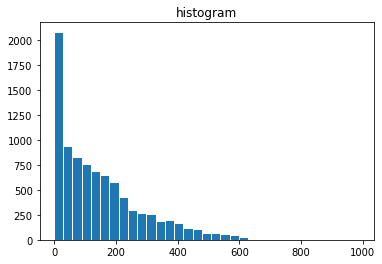

In [10]:
binblock=np.arange(0, 1000, 30)
plt.hist(bikes['cnt'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

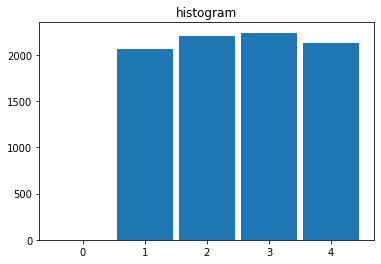

In [11]:
np.unique(bikes['season'])
binblock=np.arange(-0.5, 5, 1)
plt.hist(bikes['season'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

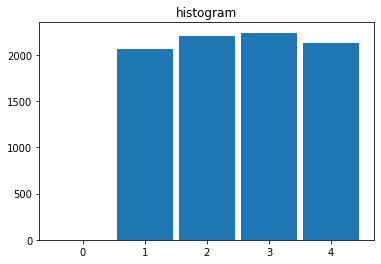

In [12]:
np.unique(bikes['season'])
binblock=np.arange(-0.5, 5, 1)
plt.hist(bikes['season'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

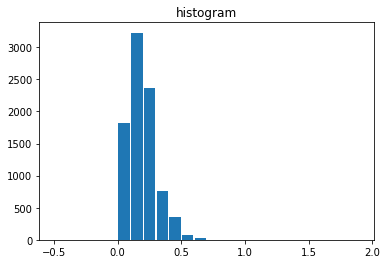

In [13]:
np.unique(bikes['windspeed'])
binblock=np.arange(-0.5, 2, 0.1)
plt.hist(bikes['windspeed'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

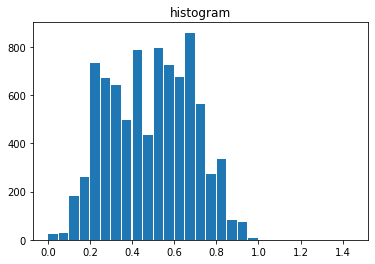

In [14]:
binblock=np.arange(0, 1.5, 0.05)
plt.hist(bikes['temp'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

# Data Visualization 

### Scatter Plots & Data Aggregation

- ### Weekday

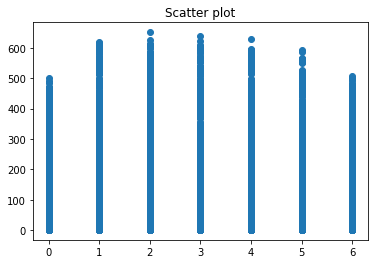

In [15]:
plt.scatter(bikes['weekday'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

In [16]:
bikes_weekday=bikes[['cnt','weekday']].groupby('weekday').mean().reset_index()
bikes_weekday

,weekday,cnt
0,0,143.845654
1,1,145.927935
2,2,147.576105
3,3,137.647681
4,4,142.491429
5,5,146.897498
6,6,142.201741


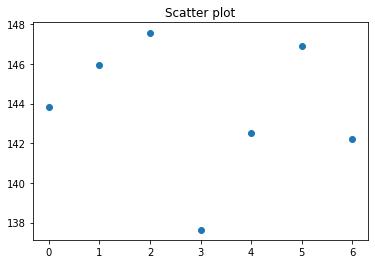

In [17]:
plt.scatter(bikes_weekday['weekday'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

- ### Weathersit

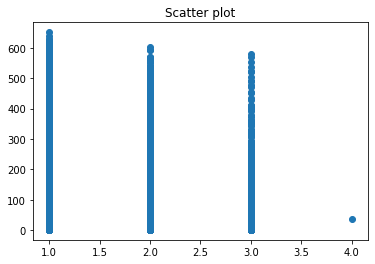

In [18]:
plt.scatter(bikes['weathersit'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

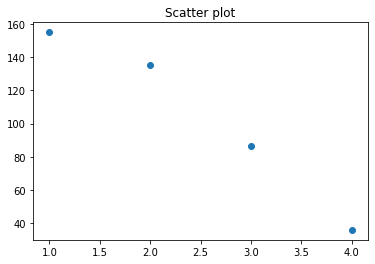

In [19]:
bikes_weekday=bikes[['cnt','weathersit']].groupby('weathersit').mean().reset_index()
plt.scatter(bikes_weekday['weathersit'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

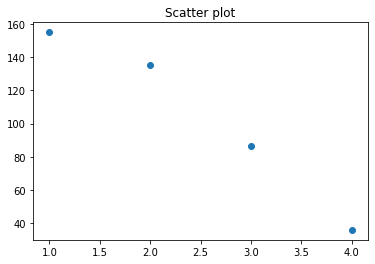

In [20]:
bikes_weekday=bikes[['cnt','weathersit']].groupby('weathersit').mean().reset_index()
plt.scatter(bikes_weekday['weathersit'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

- ### Holiday

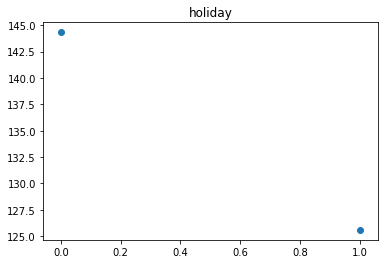

In [21]:
bikes_weekday=bikes[['cnt','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['cnt'])
plt.title('holiday')
plt.show()

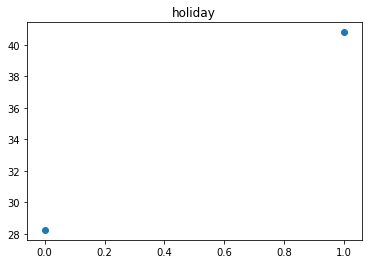

In [22]:
bikes_weekday=bikes[['casual','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['casual'])
plt.title('holiday')
plt.show()

- ### Workingday

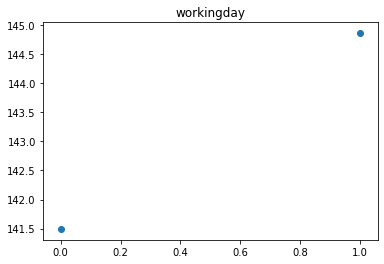

In [23]:
bikes_weekday=bikes[['cnt','workingday']].groupby('workingday').mean().reset_index()
plt.scatter(bikes_weekday['workingday'], bikes_weekday['cnt'])
plt.title('workingday')
plt.show()

- ### temp

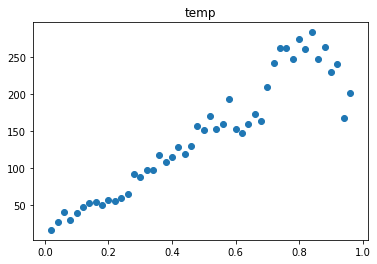

In [24]:
bikes_weekday=bikes[['cnt','temp']].groupby('temp').mean().reset_index()
plt.scatter(bikes_weekday['temp'], bikes_weekday['cnt'])
plt.title('temp')
plt.show()

## Modeling

- ## First try

In [25]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y=bikes['cnt']

X=sm.add_constant(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
X

In [27]:
bike_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8632
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3740e+05
Date:                Tue, 01 Oct 2019   Deviance:                   6.2176e+05
Time:                        17:42:16   Pearson chi2:                 6.88e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5576      0.006    552.398      0.0

## Model Interpretation

- #### How do you interpreting the $\beta$s?
- #### p-value and statistic significance

In [28]:
np.exp(np.dot(bike_model.params,X.iloc[0]))

29.842909028198306

In [29]:
bike_model.params

const         3.557642
season        0.103619
mnth          0.057313
day          -0.001102
hr            0.047837
holiday      -0.121971
weekday      -0.001119
workingday   -0.024833
weathersit   -0.013143
temp          0.323796
atemp         1.527074
hum          -1.011139
windspeed     0.291888
dtype: float64

In [30]:
ypred1st=bike_model.predict(X)
bikes['ypred1st']=ypred1st

In [31]:
bikes['ypred1st']

0        29.842909
1        30.698314
2        32.202506
3        36.602817
4        38.396324
5        38.960093
6        38.993322
7        37.375816
8        46.493283
9        54.351777
10       67.095881
11       61.136747
12       78.228493
13       90.781499
14       94.816450
15       92.207078
16       89.266746
17       96.043755
18       90.054404
19       94.466994
20       98.475413
21      101.516133
22      100.083213
23      124.591273
24       41.696239
25       39.447387
26       38.136659
27       43.936697
28       46.089559
29       57.759627
           ...    
8615    124.765124
8616    148.323541
8617    128.168152
8618    138.478399
8619    133.309484
8620    151.967507
8621     60.782693
8622     64.828964
8623     68.005529
8624     71.337743
8625     66.041915
8626     60.257132
8627     71.044496
8628     66.128656
8629     63.362753
8630     74.706093
8631     84.691360
8632     96.249310
8633    168.287720
8634    175.935295
8635    151.385468
8636    173.

In [32]:
X[0:1]

,const,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0


#### Interpreting $\beta_{temp}=0.3238$

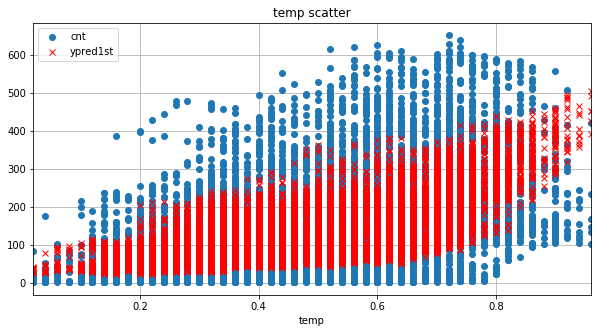

In [33]:
bikes.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp scatter')
plt.show()

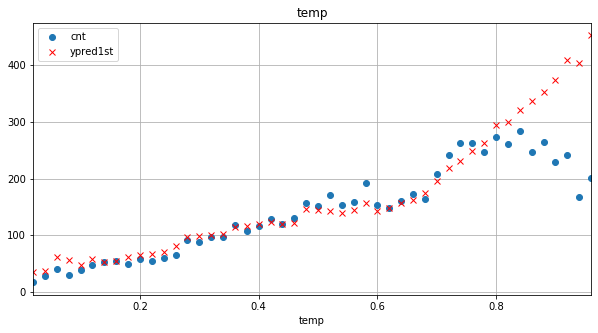

In [34]:
bikes_agg=bikes[['ypred1st','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

#### Interpreting $\beta_{holiday}=-0.1220$

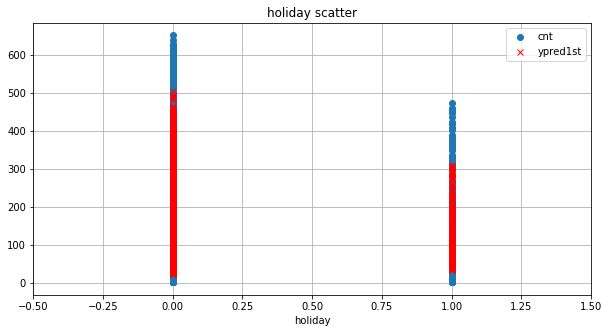

In [35]:
bikes.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('holiday scatter')
plt.xlim([-0.5,1.5])
plt.show()

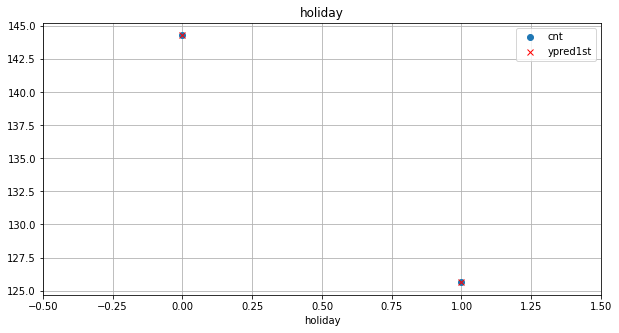

In [36]:
bikes_agg=bikes[['ypred1st','cnt', 'holiday']].groupby('holiday').mean().reset_index()
bikes_agg.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,1.5])
plt.title('holiday')
plt.show()

#### Interpreting $\beta_{mnth}=0.0573$

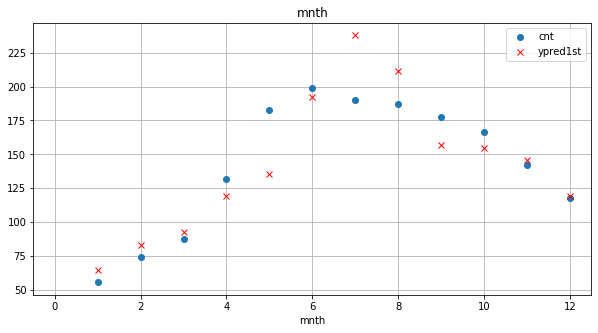

In [37]:
bikes_agg=bikes[['ypred1st','cnt', 'mnth']].groupby('mnth').mean().reset_index()
bikes_agg.plot(x='mnth', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,12.5])
plt.title('mnth')
plt.show()

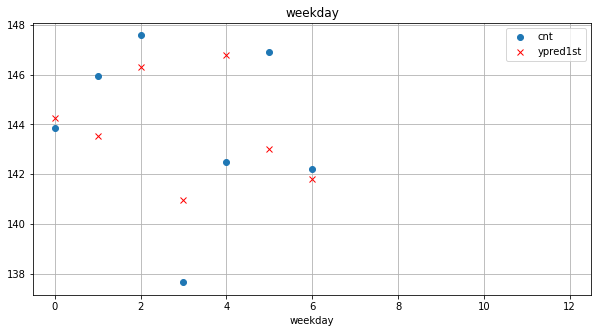

In [38]:
bikes_agg=bikes[['ypred1st','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,12.5])
plt.title('weekday')
plt.show()

## Second Try with Feature Engineering

- ### Polynomial transformation

In [39]:
bikes['tempsquare']=np.power(bikes['temp'], 6)

In [40]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'tempsquare']]
y=bikes['cnt']

In [41]:
X=sm.add_constant(X)
bike_model2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8631
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2869e+05
Date:                Tue, 01 Oct 2019   Deviance:                   6.0434e+05
Time:                        17:42:48   Pearson chi2:                 6.76e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4038      0.007    510.656      0.0

In [42]:
ypred2nd=bike_model2.predict(X)
bikes['ypred2nd']=ypred2nd

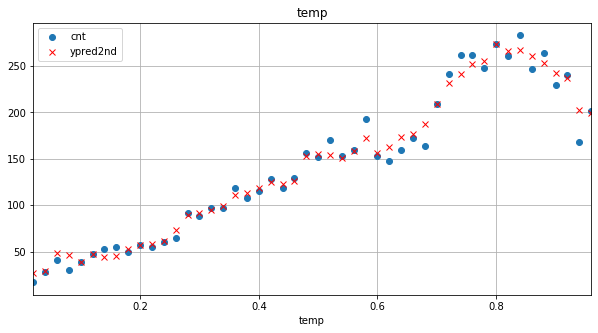

In [43]:
bikes_agg=bikes[['ypred2nd','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

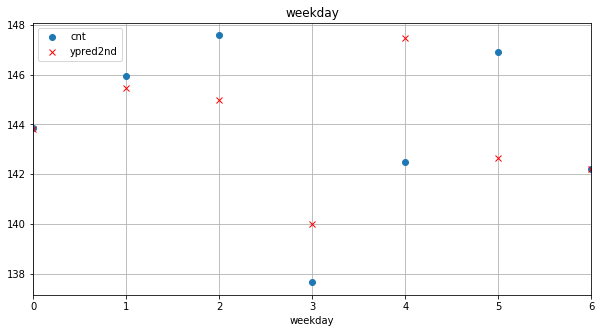

In [48]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

- ### One Hot Encoding

In [49]:
bikes.columns

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'ypred1st', 'tempsquare', 'ypred2nd'],
      dtype='object')

In [50]:
bikes['weekdaystr']=bikes['weekday'].astype(str)

In [51]:
one_hot = pd.get_dummies(bikes['weekdaystr'])

In [52]:
bikes = bikes.drop('weekdaystr',axis = 1)
bikes = bikes.join(one_hot)

In [53]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,ypred1st,tempsquare,ypred2nd,0,1,2,3,4,5,6
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,29.842909,0.000191,25.859494,0,0,0,0,0,0,1
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,30.698314,0.000113,26.145587,0,0,0,0,0,0,1
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,32.202506,0.000113,27.408055,0,0,0,0,0,0,1
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,36.602817,0.000191,32.051245,0,0,0,0,0,0,1
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,38.396324,0.000191,33.598873,0,0,0,0,0,0,1
5,1,1,1,5,0,6,0,2,0.24,0.2576,...,38.960093,0.000191,34.105269,0,0,0,0,0,0,1
6,1,1,1,6,0,6,0,1,0.22,0.2727,...,38.993322,0.000113,33.097671,0,0,0,0,0,0,1
7,1,1,1,7,0,6,0,1,0.20,0.2576,...,37.375816,0.000064,30.727406,0,0,0,0,0,0,1
8,1,1,1,8,0,6,0,1,0.24,0.2879,...,46.493283,0.000191,40.573637,0,0,0,0,0,0,1
9,1,1,1,9,0,6,0,1,0.32,0.3485,...,54.351777,0.001074,50.917818,0,0,0,0,0,0,1


In [54]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0',
       '1', '2', '3', '4', '5', '6']]
y=bikes['cnt']
X=sm.add_constant(X)
bike_model3 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2845e+05
Date:                Tue, 01 Oct 2019   Deviance:                   6.0386e+05
Time:                        17:43:50   Pearson chi2:                 6.76e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6085      0.005    523.817      0.0

In [55]:
ypred3rd=bike_model3.predict(X)
bikes['ypred3rd']=ypred3rd

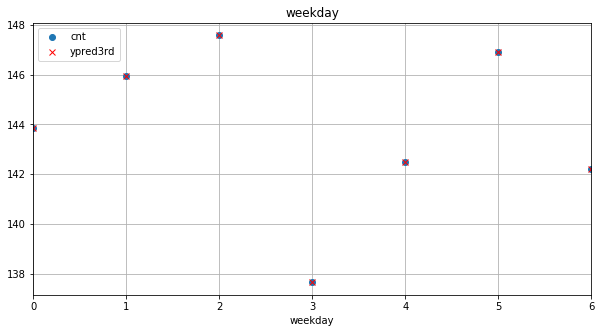

In [56]:
bikes_agg=bikes[['ypred3rd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred3rd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

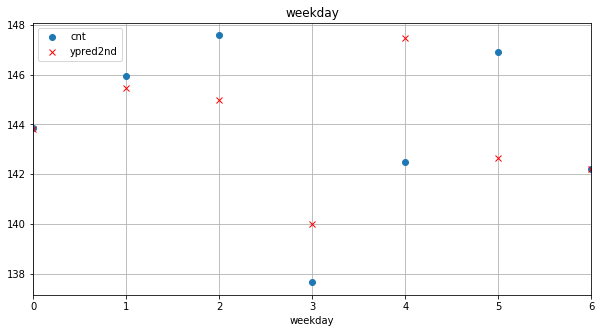

In [57]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

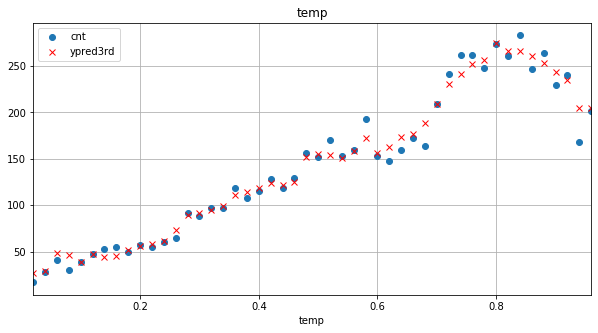

In [58]:
bikes_agg=bikes[['ypred3rd','cnt', 'temp']].groupby('temp').mean().reset_index()
bikes_agg.plot(x='temp', y=['cnt', 'ypred3rd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

## Model Evaulation

- ### Log likelihood

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-\lambda_i-log(y_i!)$

Using Stirling's formula to approximate $log(y_i!)=y_ilog(y_i)-y_i$

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-y_ilog(y_i)+y_i-\lambda_i$

In [ ]:
from scipy.special import gamma, factorial
facsum=0
for i in y:
    if np.isinf(factorial(i)):
        facsum+=i*np.log(i)-i
    else:
        facsum+=np.log(factorial(i))

np.dot(y, np.log(bikes["ypred1st"]))-np.sum(bikes["ypred1st"])-facsum

In [ ]:
np.dot(y, np.log(bikes["ypred1st"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred1st"])

In [59]:
bike_model.llf

-337400.001423492

In [60]:
bike_model2.llf

-328689.13777909137

In [61]:
bike_model3.llf

-328451.1818657682

In [62]:
bike_model.deviance

621762.2107976824

In [63]:
bike_model2.deviance

604340.4835088813

In [64]:
bike_model3.deviance

603864.571682235

- ### ${\displaystyle \mathrm {AIC} \,=\,2k-2log(L)}$

In [69]:
2*13-2*bike_model.llf

674826.002846984

In [65]:
bike_model.aic

674826.002846984

In [66]:
bike_model2.aic

657406.2755581827

In [67]:
bike_model3.aic

656938.3637315364

## Cross Validation and Model Comparison

In [72]:
import numpy as np
from sklearn.utils import shuffle
bikes_shuffle=shuffle(bikes)

In [77]:
bikes.head(5)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,ypred2nd,0,1,2,3,4,5,6,ypred3rd
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,0.000191,25.859494,0,0,0,0,0,0,1,25.778490
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,0.000113,26.145587,0,0,0,0,0,0,1,26.060363
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,0.000113,27.408055,0,0,0,0,0,0,1,27.318500
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,0.000191,32.051245,0,0,0,0,0,0,1,31.948248
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,0.000191,33.598873,0,0,0,0,0,0,1,33.490639


In [78]:
bikes_shuffle.head(5)

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,ypred2nd,0,1,2,3,4,5,6,ypred3rd
4253,3,7,182,3,0,5,1,1,0.64,0.6212,...,0.068719,136.516936,0,0,0,0,0,1,0,140.317628
5232,3,8,222,22,0,3,1,1,0.74,0.6515,...,0.164206,419.171020,0,0,0,1,0,0,0,411.343611
5554,3,8,236,8,0,3,1,1,0.62,0.6061,...,0.056800,143.829571,0,0,0,1,0,0,0,141.260654
7027,4,10,298,10,0,2,1,1,0.50,0.4848,...,0.015625,180.125967,0,0,1,0,0,0,0,183.239172
1930,2,3,85,5,0,6,0,1,0.20,0.1970,...,0.000064,47.081962,0,0,0,0,0,0,1,46.998572


In [73]:
X_shuffle=bikes_shuffle[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed']]
y_shuffle=bikes_shuffle['cnt']

X_shuffle=bikes_shuffle[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0','1', '2', '3', '4', '5', '6']]

In [70]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [74]:
for train, test in kf.split(X_shuffle):
    print("%s %s" % (train, test))

[ 865  866  867 ... 8642 8643 8644] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [79]:
y_pred_cv= np.empty((0, 1))
for train, test in kf.split(X_shuffle):
    bike_modelcv = sm.GLM(y_shuffle.iloc[train], X_shuffle.iloc[train], family=sm.families.Poisson()).fit()
    y_pred_cv=np.append(y_pred_cv,bike_modelcv.predict(X_shuffle.iloc[test]))

In [82]:
bikes_shuffle['y_pred_cv']=y_pred_cv

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
bikes_shuffle

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,ypred2nd,0,1,2,3,4,5,6,ypred3rd,y_pred_cv
4253,3,7,182,3,0,5,1,1,0.64,0.6212,...,136.516936,0,0,0,0,0,1,0,140.317628,140.489041
5232,3,8,222,22,0,3,1,1,0.74,0.6515,...,419.171020,0,0,0,1,0,0,0,411.343611,415.582221
5554,3,8,236,8,0,3,1,1,0.62,0.6061,...,143.829571,0,0,0,1,0,0,0,141.260654,142.875918
7027,4,10,298,10,0,2,1,1,0.50,0.4848,...,180.125967,0,0,1,0,0,0,0,183.239172,185.383587
1930,2,3,85,5,0,6,0,1,0.20,0.1970,...,47.081962,0,0,0,0,0,0,1,46.998572,47.994599
7398,4,11,313,21,0,3,1,1,0.40,0.4091,...,152.139834,0,0,0,1,0,0,0,149.098942,152.608072
956,1,2,43,11,0,6,0,1,0.30,0.2727,...,97.102657,0,0,0,0,0,0,1,97.121855,98.226156
2624,2,4,114,6,0,0,0,2,0.50,0.4848,...,56.862254,1,0,0,0,0,0,0,56.859936,55.748339
6222,3,9,264,20,0,3,1,3,0.62,0.5455,...,166.793414,0,0,0,1,0,0,0,164.199940,161.483029
2968,2,5,128,14,0,0,0,1,0.60,0.6212,...,210.582817,1,0,0,0,0,0,0,210.171161,205.607030


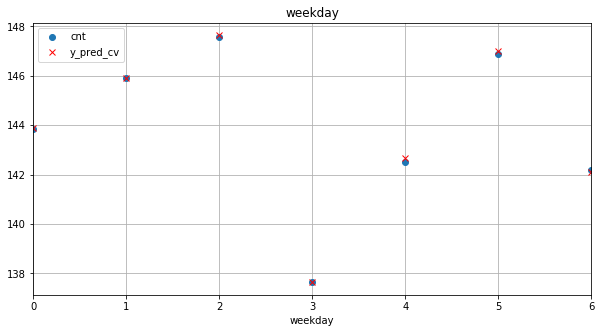

In [84]:
bikes_agg=bikes_shuffle[['y_pred_cv','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'y_pred_cv'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

In [86]:
np.dot(y_shuffle, np.log(bikes_shuffle["y_pred_cv"]))-np.dot(y_shuffle, np.log(y_shuffle))+np.sum(y_shuffle)-np.sum(bikes_shuffle["y_pred_cv"])

-303372.7034441673

In [87]:
np.dot(y, np.log(bikes["ypred3rd"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred3rd"])

-301932.28584112204

In [85]:
bike_model3.llf

-328451.1818657682